<a href="https://colab.research.google.com/github/KimeraBlitz/Panther/blob/main/Florida_Panther_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install -q https://github.com/Ziqi-Li/pointpats/archive/v2.3.zip

     - 2.8 MB 9.0 MB/s 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 22.7 MB/s eta 0:00:00


In [4]:
!pip install contextily

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 56.1 MB/s eta 0:00:00


In [22]:
!pip install python-csv

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.5/131.5 kB 5.2 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [20]:
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import contextily as cx

from pointpats import distance_statistics as stats
from pointpats import PointPattern, PoissonPointProcess


In [70]:
Panther = gpd.read_file("https://raw.githubusercontent.com/KimeraBlitz/Panther/main/Confirmed_Human-Florida_Panther_Interactions.geojson")

In [73]:
Panther.head()

,OBJECTID,Date,Year,County,Type,Collar,created_user,created_date,last_edited_user,last_edited_date,geometry
0,599,2004-05-01 04:00:00+00:00,2004,Collier,Sighting,Uncollared,FWC,2022-04-28 17:33:46+00:00,FWC,2022-04-28 17:33:46+00:00,POINT (-81.63256 26.09395)
1,600,2005-07-21 04:00:00+00:00,2005,Highlands,Sighting (tracks),Uncollared,FWC,2022-04-28 17:33:46+00:00,FWC,2022-04-28 17:33:46+00:00,POINT (-81.31561 27.07971)
2,601,2005-08-12 04:00:00+00:00,2005,Collier,Sighting,Uncollared,FWC,2022-04-28 17:33:46+00:00,FWC,2022-04-28 17:33:46+00:00,POINT (-81.50416 26.18447)
3,602,2006-02-16 05:00:00+00:00,2006,Collier,Threat,FP79,FWC,2022-04-28 17:33:46+00:00,FWC,2022-04-28 17:33:46+00:00,POINT (-81.36353 25.94774)
4,603,2006-03-08 05:00:00+00:00,2006,Hendry,Encounter,Uncollared,FWC,2022-04-28 17:33:46+00:00,FWC,2022-04-28 17:33:46+00:00,POINT (-80.98312 26.35842)


In [75]:
Panther.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

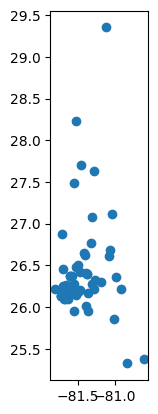

In [76]:
Panther.plot()

<Axes: xlabel='None', ylabel='None'>

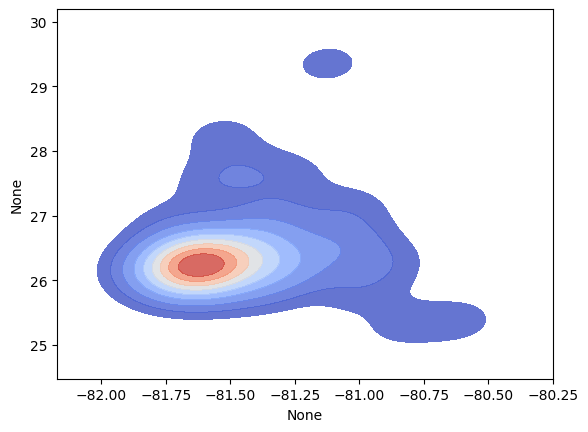

In [77]:
sns.kdeplot(data=Panther,
            x=Panther.geometry.x,
            y=Panther.geometry.y,
            bw_method=0.5,
            fill=True,
            cmap="coolwarm",
            alpha=0.8)

<Axes: xlabel='None', ylabel='None'>

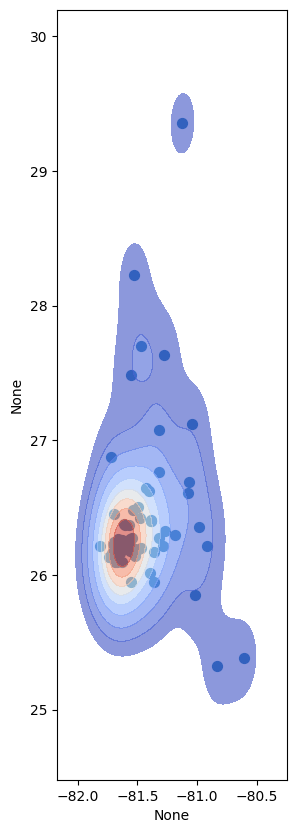

In [78]:
f, ax = plt.subplots(figsize=(10,10))
Panther.plot(ax=ax, markersize = 50)
sns.kdeplot(ax=ax, data=Panther,
            x=Panther.geometry.x,
            y=Panther.geometry.y,
            bw_method=0.5,
            fill=True,
            cmap="coolwarm",
            alpha=0.6)

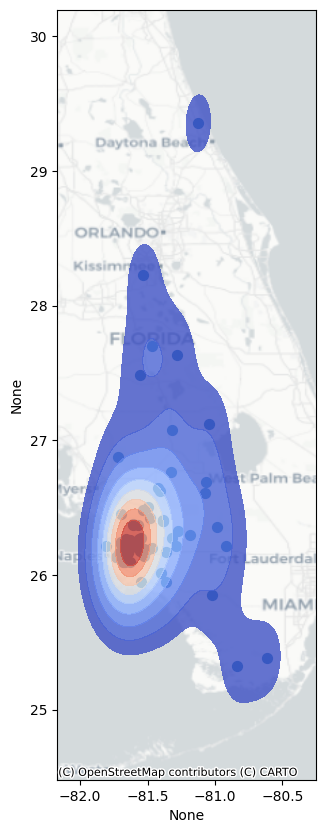

In [79]:
f, ax = plt.subplots(figsize=(10,10))

Panther.plot(ax=ax, markersize = 50, figsize=(9,9))
sns.kdeplot(ax=ax,data=Panther, x=Panther.geometry.x, y=Panther.geometry.y, bw_method=0.5, fill=True,
            cmap="coolwarm",alpha=0.8,weights=Panther.OBJECTID)

cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, crs=Panther.crs)

In [81]:
x = Panther.geometry.x.values
y = Panther.geometry.y.values

points = np.array(list(zip(x,y)))

In [82]:
pp = PointPattern(points)

/usr/local/lib/python3.10/dist-packages/pointpats/window.py:15: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  return ps.cg.shapes.Polygon(c)
/usr/local/lib/python3.10/dist-packages/libpysal/cg/shapes.py:1408: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  self._part_rings = [Ring(vertices)]
/usr/local/lib/python3.10/dist-packages/pointpats/window.py:68: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  super(Window, self).__init__(parts)
/usr/local/lib/python3.10/dist-packages/libpysal/cg/shapes.py:1405: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  self._part_rings = list(map(Ring, vertices))


In [84]:
CSRs = PoissonPointProcess(pp.window, pp.n, 100, asPP=True) # simulate CSR 100 times

/usr/local/lib/python3.10/dist-packages/libpysal/cg/shapes.py:1614: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  self._bounding_box = Rectangle(
/usr/local/lib/python3.10/dist-packages/pointpats/process.py:142: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  pnts = [ps.cg.shapes.Point((x, y)) for x, y in pnts]
/usr/local/lib/python3.10/dist-packages/libpysal/cg/shapes.py:1195: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  self._bounding_box = Rectangle(min(x), min(y), max(x), max(y))


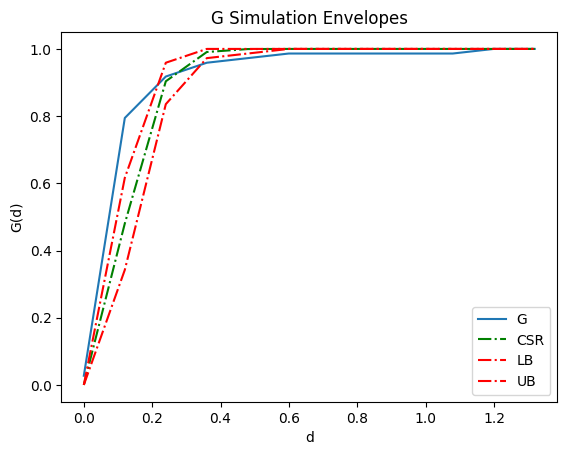

In [85]:
genv = stats.Genv(pp, realizations=CSRs,pct=0.05)

genv.plot()

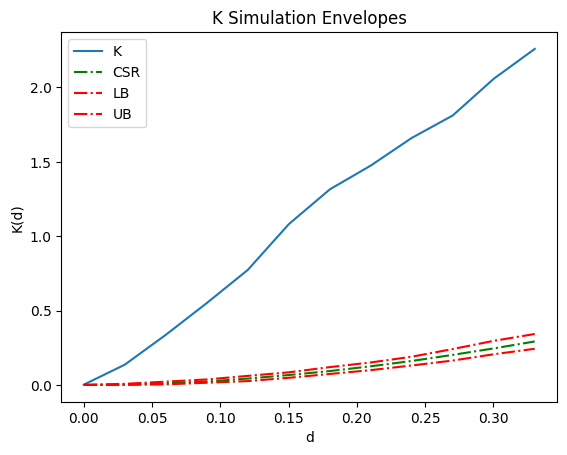

In [86]:
kenv = stats.Kenv(pp, realizations=CSRs,pct=0.05)

kenv.plot()